# Assignment - 11 (Text Mining)

### ONE:
1) Perform sentimental analysis on the Elon-musk tweets

In [ ]:
# Install Libraries if not installed
#%pip install spacy
#!python -m spacy download en_core_web_md
#!pip install wordcloud

In [ ]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import spacy
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
# load the dataset
Elon=pd.read_csv("Elon_musk.csv",encoding='Latin-1')
Elon.drop(['Unnamed: 0'],inplace=True,axis=1)
Elon

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

### Text Preprocessing

In [ ]:
Elon=[Text.strip() for Text in Elon.Text] # remove both the leading and the trailing characters
Elon=[Text for Text in Elon if Text] # removes empty strings, because they are considered in Python as False
Elon[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
# Joining the list into one string/text
Elon_text=' '.join(Elon)
Elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
Elon_tokens=tknzr.tokenize(Elon_text)
print(Elon_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [ ]:
# Again Joining the list into one string/text
Elon_tokens_text=' '.join(Elon_tokens)
Elon_tokens_text

In [ ]:
# Remove Punctuations
Punctuations =Elon_tokens_text.translate(str.maketrans('','',string.punctuation))
Punctuations

In [ ]:
# remove https or url within text
import re
url=re.sub(r'http\S+', '', Punctuations )
url

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_tokens=word_tokenize(url)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Tokens count
len(text_tokens)

17847

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster']


In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster']


In [ ]:
# Lemmatization
#!python -m spacy download en
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'star

In [ ]:
clean_tweets=' '.join(lemmas)
clean_tweets

### Feature Extaction

#### 1. Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.vocabulary_)

{'alien': 195, 'ray': 2359, 'trace': 3023, 'cyberpunk': 769, 'hdr': 1364, 'nextlevel': 1969, 'have': 1359, 'try': 3055, 'great': 1312, 'interview': 1561, 'doge': 894, 'underestimate': 3188, 'congratulation': 677, 'tesla': 2931, 'china': 587, 'amazing': 219, 'execution': 1063, 'last': 1645, 'year': 3405, 'now': 1997, 'next': 1968, 'even': 1037, 'happy': 1346, 'new': 1966, 'ox': 2098, 'frodo': 1213, 'underdoge': 3187, 'all': 198, 'think': 2959, 'would': 3391, 'fail': 1098, 'himself': 1406, 'haha': 1335, 'thank': 2941, 'indeed': 1502, 'tweet': 3070, 'definitely': 807, 'represent': 2426, 'realworld': 2374, 'time': 2982, 'allocation': 200, 'the': 2945, 'entertaining': 1007, 'outcome': 2076, 'likely': 1699, 'just': 1603, 'send': 2569, 'agree': 179, 'clubhouse': 616, 'it': 1580, 'get': 1272, 'real': 2369, 'buy': 505, 'dogecoin': 896, 'lil': 1700, 'toddler': 2993, 'hodler': 1412, 'he': 1365, 'issue': 1579, 'sentencing': 2574, 'seem': 2561, 'bit': 420, 'high': 1398, 'fix': 1158, 'please': 2193,

In [ ]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'aiming', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'aliens', 'align', 'all', '

In [ ]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(tweetscv.toarray().shape)

(11486, 3425)


#### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 3. TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock',

#### 4. Generate Word Cloud

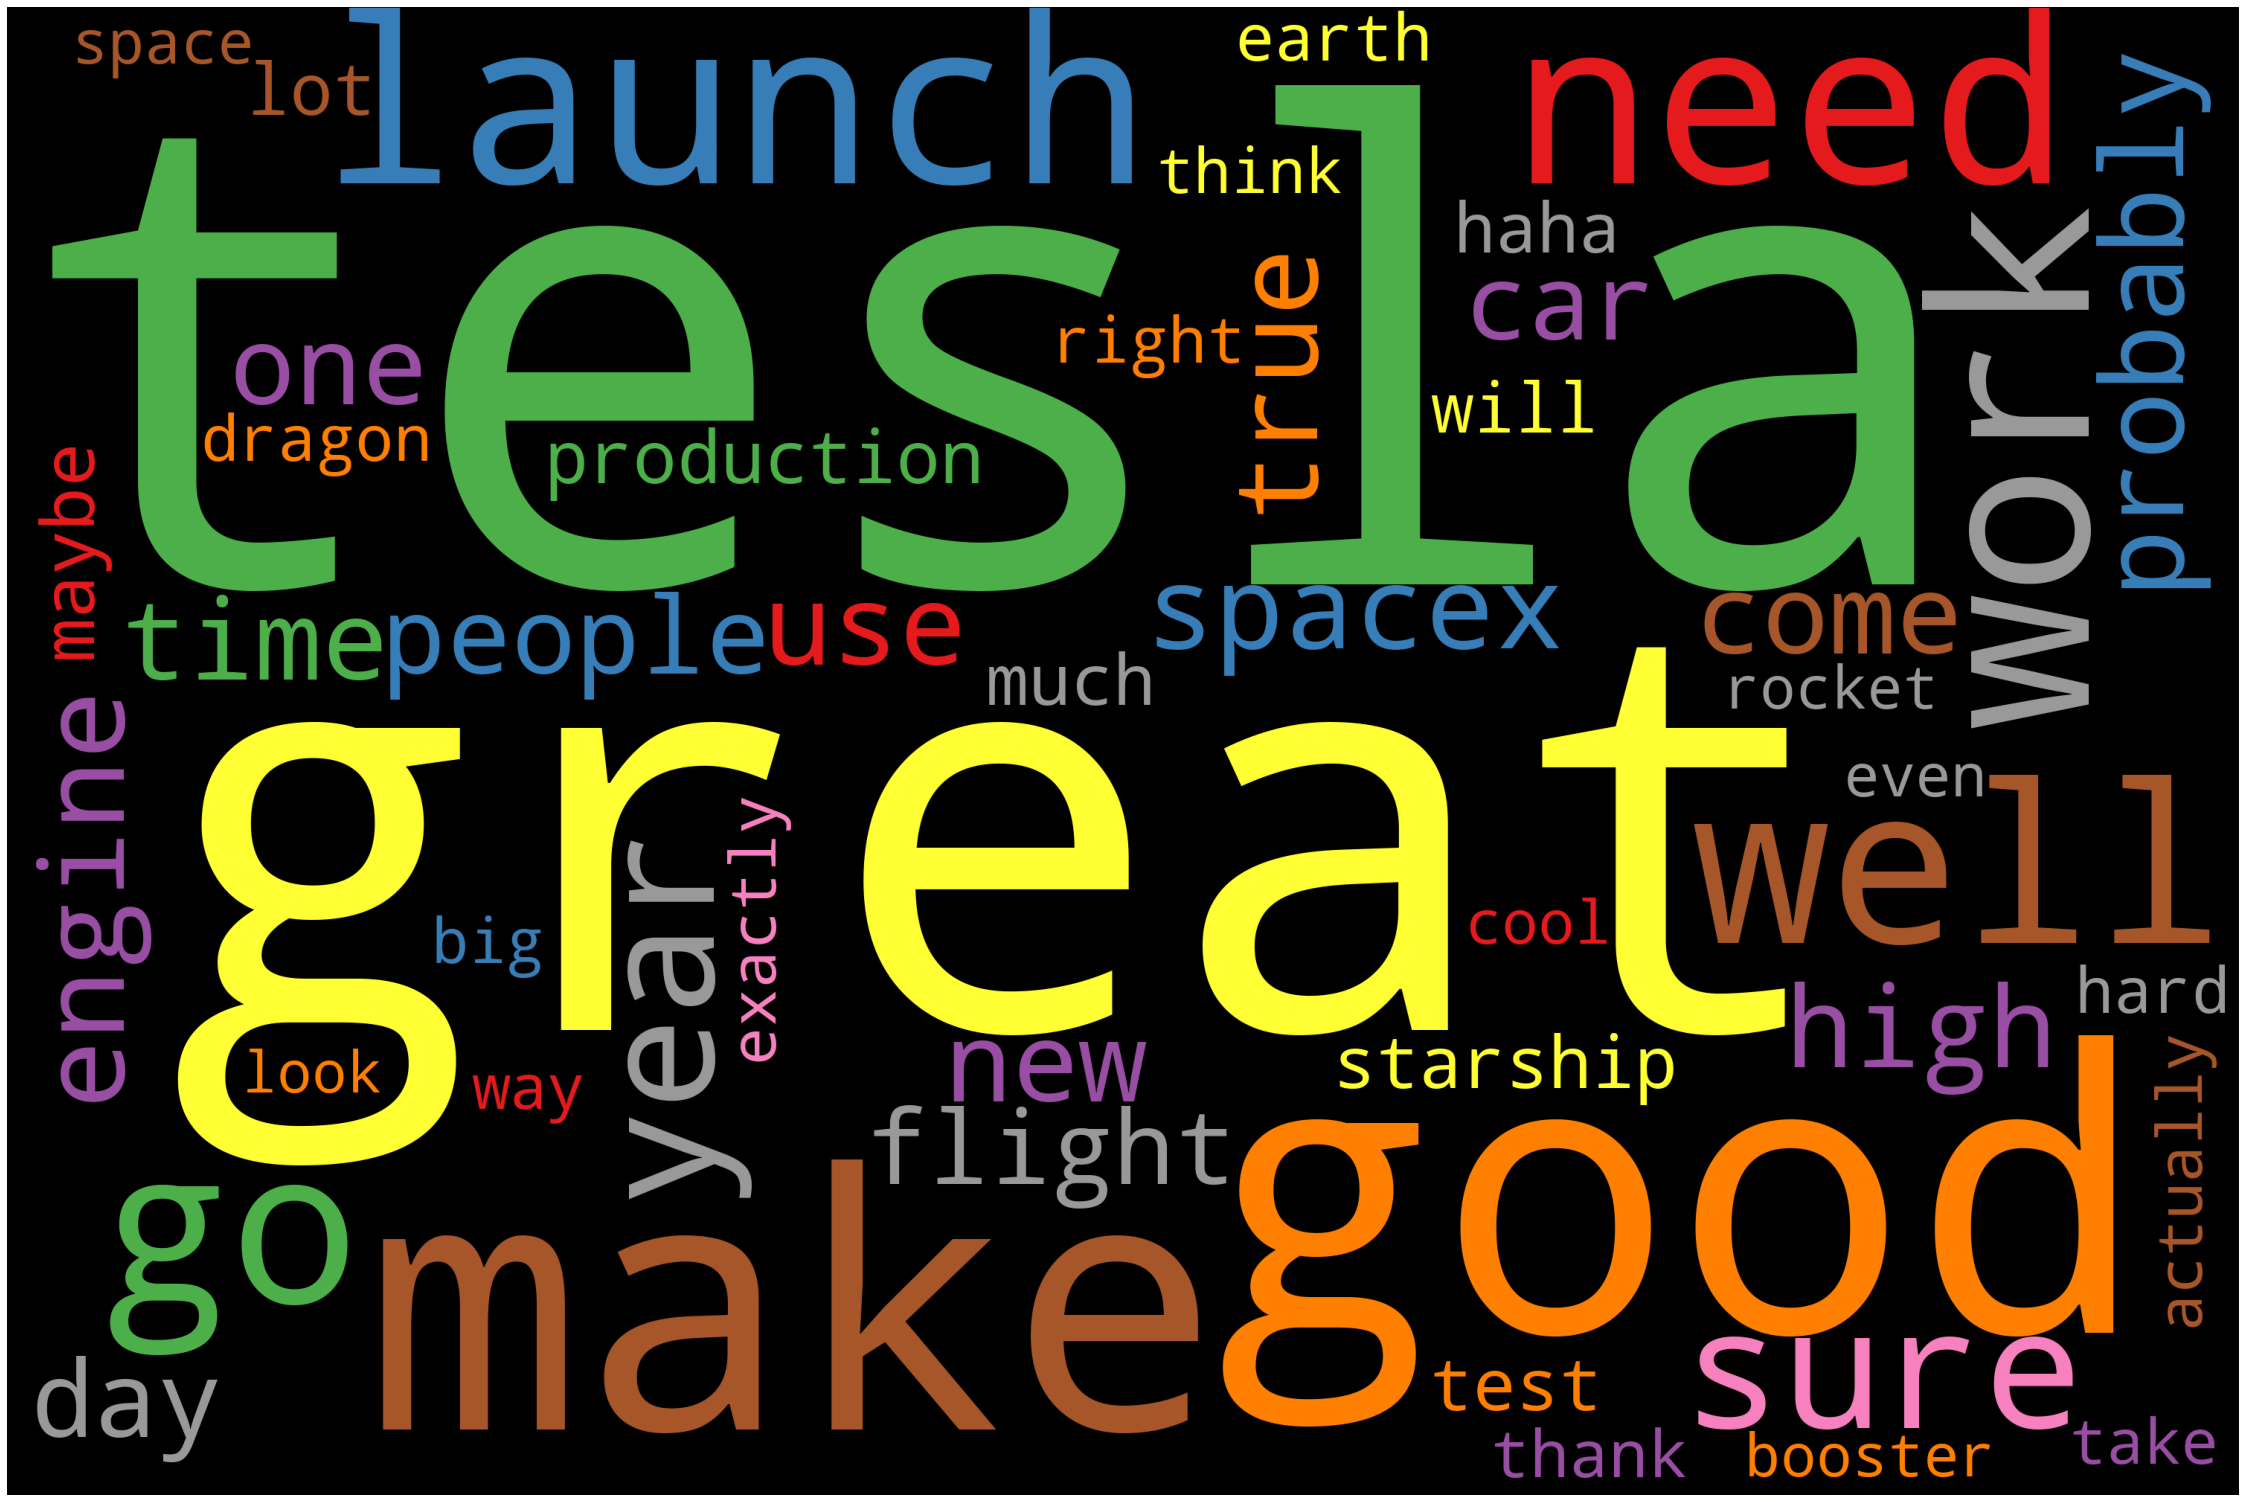

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

#### 5. Named Entity Recognition (NER)

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'destroyer', 'happen', 'sandstorm', 'masterpiece', 'dumb', 'time', 'try', 'pull']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0  launch     64
1    make     64
2    year     49
3    work     48
4      go     47
5    need     42
6    come     39
7     get     38
8     day     38
9    time     37

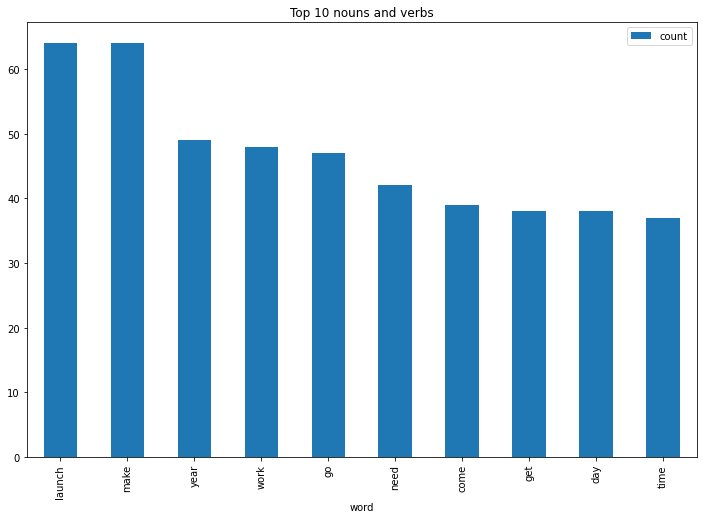

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

#### 6. Emotion Mining - Sentiment Analysis

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(Elon))
sentences

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [ ]:
afin = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\DS Assignments\Assignment 11\Afinn.csv",  encoding='latin-1')
afin
#sep=',',

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [ ]:
affinity_scores=afin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='great')

3

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -6   
680  Occasional flights from land are ok, but frequ...               -4   
886  This is primarily an electrical/electronic (ch...               -4   
..                                                 ...              ...   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               15   
719  We just havent observed the
 https://t.co/mez...               15   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   

     word_count  
647          60  
64           11  
837          61  
680          39  
886          69  
..          ...  
645          65  
585         138  
36          231  
719          72  
105          94  

[924 rows x 3 columns]

In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[488 rows x 3 columns]

In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                3   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
..                                                 ...              ...   
911                       He was one of the very best.                3   
913  @Ali_Afshari In general, we need to improve ho...                4   
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...                3   
917               This is both great &amp; terrifying.                3   
918  Everything weve ever sensed or thought has be...                3   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
911           7  
913          87  
915          15  
917           6  
918          17  

[436 rows x 3 columns]

In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

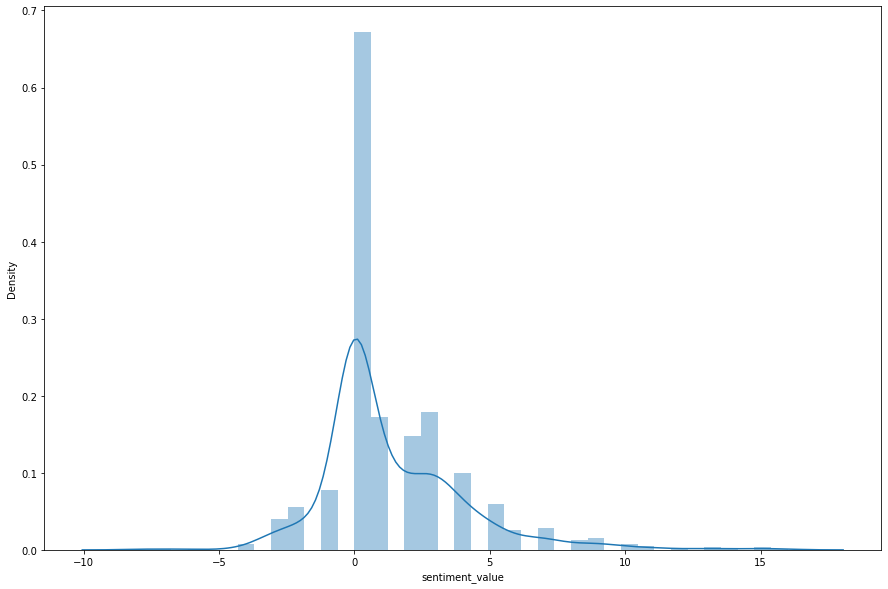

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

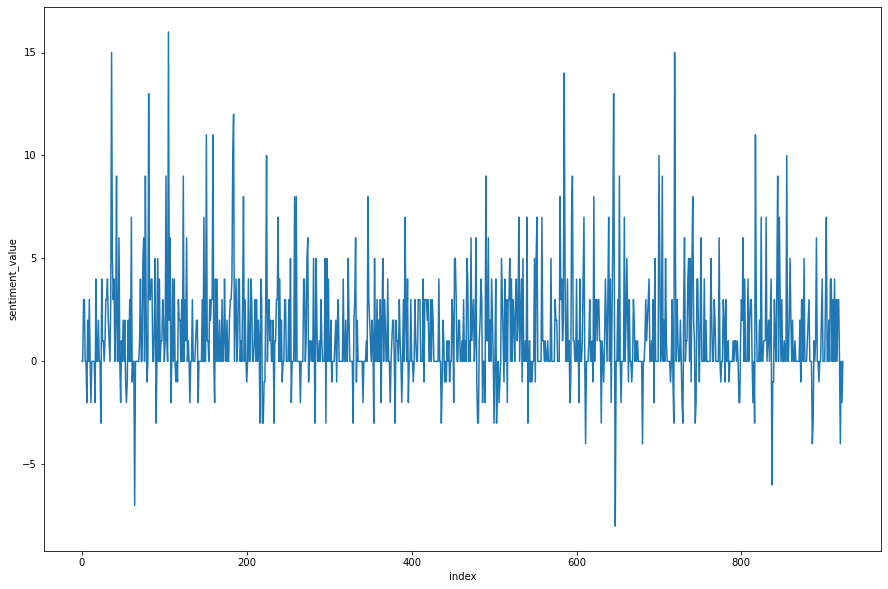

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

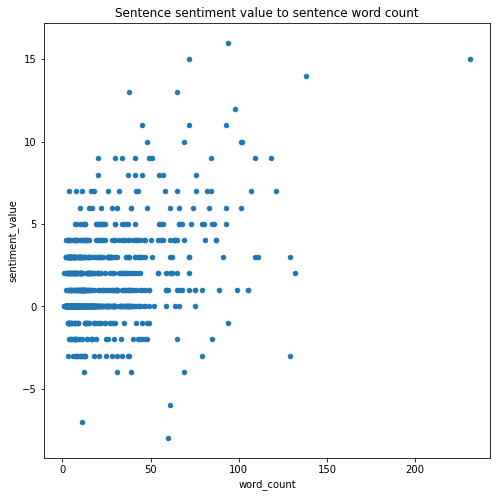

In [ ]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count');

### TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
#!pip install scrapy

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
# Import extracted amazon reviews Dataset
import pandas as pd
reviews=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\DS Assignments\Assignment 11\extract_reviews.csv")
reviews

stars                                            comment
0     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Delivered on time ...
1     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Delivered on time ...
2     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Let me sum up my m...
3     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Pros:Form factor i...
4     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Nice and small pho...
...                  ...                                                ...
1195  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    It’s a powerful an...
1196  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Handy and easy to ...
1197  4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Product is just fa...
1198  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Anything and every...
1199  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    You don't need a b...

[1200 rows x 2 columns]

### Text Preprocessing

In [ ]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

In [ ]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'Delivered on time and the product was as per specs. No cheating. Delivered on time and the product was as per specs. No cheating. Let me sum up my mind here. I hate Iphones. I used to have an work phone (Iphone SE).Being a Sony Xperia user since Sony Arc times, I didn\'t have a choice to move away form the Sony portfolio as they don\'t sell in India anymore. My XZ1 is still working after 5.5 years, but she is getting old. And I repeat I hate IPhones.After much deliberation between 12, 13 and 13 Mini, I went with 13 Mini.1. I really wanted a phone I could use in a single hand, it fits perfect.2. I got a great deal on the purchase, as the net amt I paid was Rs. 58,900 after card discounts. So it is cheaper than a lot of Android phones with high end configuration.3. Performance. It is smooth and fast.4. Face Id works. I don\'t like it, but it works, I miss the Touch Id, but i knew what I was getting. So no complains.5. The Starlight colour is beautiful. I love whites.6. Camera is brillia

In [ ]:
# Remove Punctuations
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Delivered on time and the product was as per specs No cheating Delivered on time and the product was as per specs No cheating Let me sum up my mind here I hate Iphones I used to have an work phone Iphone SEBeing a Sony Xperia user since Sony Arc times I didnt have a choice to move away form the Sony portfolio as they dont sell in India anymore My XZ1 is still working after 55 years but she is getting old And I repeat I hate IPhonesAfter much deliberation between 12 13 and 13 Mini I went with 13 Mini1 I really wanted a phone I could use in a single hand it fits perfect2 I got a great deal on the purchase as the net amt I paid was Rs 58900 after card discounts So it is cheaper than a lot of Android phones with high end configuration3 Performance It is smooth and fast4 Face Id works I dont like it but it works I miss the Touch Id but i knew what I was getting So no complains5 The Starlight colour is beautiful I love whites6 Camera is brilliant I am a point shoot not a camera buff My Sony

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Delivered', 'on', 'time', 'and', 'the', 'product', 'was', 'as', 'per', 'specs', 'No', 'cheating', 'Delivered', 'on', 'time', 'and', 'the', 'product', 'was', 'as', 'per', 'specs', 'No', 'cheating', 'Let', 'me', 'sum', 'up', 'my', 'mind', 'here', 'I', 'hate', 'Iphones', 'I', 'used', 'to', 'have', 'an', 'work', 'phone', 'Iphone', 'SEBeing', 'a', 'Sony', 'Xperia', 'user', 'since', 'Sony', 'Arc']


In [ ]:
len(text_tokens)

102840

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Delivered', 'time', 'product', 'per', 'specs', 'No', 'cheating', 'Delivered', 'time', 'product', 'per', 'specs', 'No', 'cheating', 'Let', 'sum', 'mind', 'hate', 'Iphones', 'used', 'work', 'phone', 'Iphone', 'SEBeing', 'Sony', 'Xperia', 'user', 'since', 'Sony', 'Arc', 'times', 'didnt', 'choice', 'move', 'away', 'form', 'Sony', 'portfolio', 'dont', 'sell', 'India', 'anymore', 'My', 'XZ1', 'still', 'working', '55', 'years', 'getting', 'old', 'And', 'repeat', 'hate', 'IPhonesAfter', 'much', 'deliberation', '12', '13', '13', 'Mini', 'went', '13', 'Mini1', 'really', 'wanted', 'phone', 'could', 'use', 'single', 'hand', 'fits', 'perfect2', 'got', 'great', 'deal', 'purchase', 'net', 'amt', 'paid', 'Rs', '58900', 'card', 'discounts', 'So', 'cheaper', 'lot', 'Android', 'phones', 'high', 'end', 'configuration3', 'Performance', 'smooth', 'fast4', 'Face', 'Id', 'works', 'dont', 'like', 'works', 'miss', 'Touch', 'Id', 'knew', 'getting', 'So', 'complains5', 'Starlight', 'colour', 'beautiful', 'love'

In [ ]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['delivered', 'time', 'product', 'per', 'specs', 'no', 'cheating', 'delivered', 'time', 'product', 'per', 'specs', 'no', 'cheating', 'let', 'sum', 'mind', 'hate', 'iphones', 'used', 'work', 'phone', 'iphone', 'sebeing', 'sony', 'xperia', 'user', 'since', 'sony', 'arc', 'times', 'didnt', 'choice', 'move', 'away', 'form', 'sony', 'portfolio', 'dont', 'sell', 'india', 'anymore', 'my', 'xz1', 'still', 'working', '55', 'years', 'getting', 'old', 'and', 'repeat', 'hate', 'iphonesafter', 'much', 'deliberation', '12', '13', '13', 'mini', 'went', '13', 'mini1', 'really', 'wanted', 'phone', 'could', 'use', 'single', 'hand', 'fits', 'perfect2', 'got', 'great', 'deal', 'purchase', 'net', 'amt', 'paid', 'rs', '58900', 'card', 'discounts', 'so', 'cheaper', 'lot', 'android', 'phones', 'high', 'end', 'configuration3', 'performance', 'smooth', 'fast4', 'face', 'id', 'works', 'dont', 'like', 'works', 'miss', 'touch', 'id', 'knew', 'getting', 'so', 'complains5', 'starlight', 'colour', 'beautiful', 'love'

In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['deliv', 'time', 'product', 'per', 'spec', 'no', 'cheat', 'deliv', 'time', 'product', 'per', 'spec', 'no', 'cheat', 'let', 'sum', 'mind', 'hate', 'iphon', 'use', 'work', 'phone', 'iphon', 'sebe', 'soni', 'xperia', 'user', 'sinc', 'soni', 'arc', 'time', 'didnt', 'choic', 'move', 'away', 'form', 'soni', 'portfolio', 'dont', 'sell', 'india', 'anymor', 'my', 'xz1', 'still', 'work', '55', 'year', 'get', 'old', 'and', 'repeat', 'hate', 'iphonesaft', 'much', 'deliber', '12', '13', '13', 'mini', 'went', '13', 'mini1', 'realli', 'want', 'phone', 'could', 'use', 'singl', 'hand', 'fit', 'perfect2', 'got', 'great', 'deal', 'purchas', 'net', 'amt', 'paid', 'rs', '58900', 'card', 'discount', 'so', 'cheaper', 'lot', 'android', 'phone', 'high', 'end', 'configuration3', 'perform', 'smooth', 'fast4', 'face', 'id', 'work', 'dont', 'like', 'work', 'miss', 'touch', 'id', 'knew', 'get', 'so', 'complains5', 'starlight', 'colour', 'beauti', 'love', 'whites6', 'camera', 'brilliant', 'point', 'shoot', 'camera'

In [ ]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

delivered time product per specs no cheating delivered time product per specs no cheating let sum mind hate iphones used work phone iphone sebeing sony xperia user since sony arc times didnt choice move away form sony portfolio dont sell india anymore my xz1 still working 55 years getting old and repeat hate iphonesafter much deliberation 12 13 13 mini went 13 mini1 really wanted phone could use single hand fits perfect2 got great deal purchase net amt paid rs 58900 card discounts so cheaper lot android phones high end configuration3 performance smooth fast4 face id works dont like works miss touch id knew getting so complains5 starlight colour beautiful love whites6 camera brilliant point shoot camera buff my sony xz1 camera 5 years outdates refreshing7 pain point inability transfer whatsapp android iphone knew surprise but still pain8 sound come xz1 front stereo experience not many phones sound quality this phone top quality so satisfied quality9 display still love lcd panels but pre

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['deliver', 'time', 'product', 'per', 'spec', 'no', 'cheating', 'deliver', 'time', 'product', 'per', 'spec', 'no', 'cheating', 'let', 'sum', 'mind', 'hate', 'iphone', 'use', 'work', 'phone', 'iphone', 'sebee', 'sony', 'xperia', 'user', 'since', 'sony', 'arc', 'time', 'do', 'not', 'choice', 'move', 'away', 'form', 'sony', 'portfolio', 'do', 'not', 'sell', 'india', 'anymore', 'my', 'xz1', 'still', 'work', '55', 'year', 'get', 'old', 'and', 'repeat', 'hate', 'iphonesafter', 'much', 'deliberation', '12', '13', '13', 'mini', 'go', '13', 'mini1', 'really', 'want', 'phone', 'could', 'use', 'single', 'hand', 'fit', 'perfect2', 'get', 'great', 'deal', 'purchase', 'net', 'amt', 'pay', 'rs', '58900', 'card', 'discount', 'so', 'cheap', 'lot', 'android', 'phone', 'high', 'end', 'configuration3', 'performance', 'smooth', 'fast4', 'face', 'i', 'd', 'work', 'do', 'not', 'like', 'work', 'miss', 'touch', 'i', 'd', 'know', 'get', 'so', 'complains5', 'starlight', 'colour', 'beautiful', 'love', 'whites6', 

In [ ]:
clean_reviews=' '.join(lemmas)
clean_reviews

"deliver time product per spec no cheating deliver time product per spec no cheating let sum mind hate iphone use work phone iphone sebee sony xperia user since sony arc time do not choice move away form sony portfolio do not sell india anymore my xz1 still work 55 year get old and repeat hate iphonesafter much deliberation 12 13 13 mini go 13 mini1 really want phone could use single hand fit perfect2 get great deal purchase net amt pay rs 58900 card discount so cheap lot android phone high end configuration3 performance smooth fast4 face i d work do not like work miss touch i d know get so complains5 starlight colour beautiful love whites6 camera brilliant point shoot camera buff my sony xz1 camera 5 year outdate refreshing7 pain point inability transfer whatsapp android iphone know surprise but still pain8 sound come xz1 front stereo experience not many phone sound quality this phone top quality so satisfied quality9 display still love lcd panel but pretty sharp bright love it10 notc

### Feature Extaction

#### 1. Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.vocabulary_)

{'deliver': 75, 'time': 307, 'product': 237, 'per': 215, 'spec': 288, 'no': 195, 'cheating': 50, 'let': 157, 'sum': 297, 'mind': 177, 'hate': 136, 'iphone': 147, 'use': 316, 'work': 330, 'phone': 221, 'sebee': 263, 'sony': 285, 'xperia': 331, 'user': 318, 'since': 274, 'arc': 23, 'do': 84, 'not': 197, 'choice': 51, 'move': 185, 'away': 26, 'form': 119, 'portfolio': 228, 'sell': 265, 'india': 144, 'anymore': 20, 'my': 187, 'xz1': 332, 'still': 292, '55': 7, 'year': 333, 'get': 125, 'old': 202, 'and': 18, 'repeat': 257, 'iphonesafter': 148, 'much': 186, 'deliberation': 74, '12': 1, '13': 3, 'mini': 178, 'go': 129, 'mini1': 179, 'really': 251, 'want': 322, 'could': 70, 'single': 275, 'hand': 133, 'fit': 115, 'perfect2': 217, 'great': 132, 'deal': 73, 'purchase': 241, 'net': 192, 'amt': 17, 'pay': 213, 'rs': 259, '58900': 8, 'card': 44, 'discount': 80, 'so': 283, 'cheap': 48, 'lot': 163, 'android': 19, 'high': 138, 'end': 94, 'configuration3': 64, 'performance': 218, 'smooth': 281, 'fast4'

In [ ]:
print(cv.get_feature_names()[150:300])

['it10', 'its', 'job', 'joy', 'know', 'lag', 'lcd', 'let', 'life', 'lightweight', 'like', 'literally', 'log', 'lot', 'loud', 'love', 'lovely', 'loyal', 'macrocloseup', 'many', 'market', 'max', 'may', 'mean', 'medium', 'method', 'might', 'mind', 'mini', 'mini1', 'minino', 'miss', 'mixed', 'mobile', 'model', 'move', 'much', 'my', 'nature', 'necessarily', 'necessaryapple', 'need', 'net', 'new', 'nice', 'no', 'normal', 'not', 'notch', 'note20', 'offer', 'ok', 'old', 'ole', 'one', 'online', 'only', 'opposite', 'os', 'outdate', 'pain', 'pain8', 'panel', 'pay', 'people', 'per', 'perfect', 'perfect2', 'performance', 'performanceversatile', 'personally', 'phone', 'phoneexcellent', 'photography', 'pocket', 'pocketability', 'point', 'portable', 'portfolio', 'power', 'powerful', 'ppl', 'prefer', 'pretty', 'primary', 'pro', 'problem', 'product', 'prosform', 'protector', 'prove', 'purchase', 'quality', 'quality9', 'quickly', 'quirk', 'range', 'rate', 'ratesmaller', 'rather', 're', 'really', 'recent'

In [ ]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(reviewscv.toarray().shape)

(62520, 336)


#### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['12', '13', 'adapt', 'also', 'and', 'android', 'apple', 'battery', 'be', 'beautiful', 'big', 'bright', 'but', 'call', 'camera', 'come', 'concern', 'design', 'device', 'display', 'do', 'ease', 'end', 'expensive', 'fantastic', 'feel', 'find', 'fit', 'flagship', 'get', 'good', 'great', 'hand', 'hate', 'high', 'iphone', 'its', 'know', 'life', 'love', 'medium', 'mini', 'my', 'no', 'not', 'notch', 'offer', 'one', 'perfect', 'perfect2', 'performance', 'performanceversatile', 'personally', 'phone', 'phoneexcellent', 'photography', 'pocket', 'pocketability', 'point', 'portfolio', 'power', 'powerful', 'ppl', 'prefer', 'product', 'purchase', 'quality', 'rather', 're', 'really', 'refresh', 'single', 'size', 'small', 'smooth', 'so', 'sony', 'sound', 'stereo', 'still', 'time', 'turn', 'ultra', 'unmatched', 'update', 'usage', 'use', 'useful', 'user', 'usually', 'vision', 'wall', 'want', 'wayrepair', 'well', 'work', 'xz1', 'year', 'yet', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]

#### 3. TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['100', '12', '128', '13', '1st', '2018', '34k', '55', '58900', '5gbadminor', 'absolutely', 'accessory', 'adapt', 'again', 'also', 'amazing', 'amazon', 'amt', 'and', 'android', 'anymore', 'anything', 'apple', 'arc', 'as', 'average', 'away', 'bag', 'bank', 'basically', 'battery', 'battry', 'be', 'beautiful', 'big', 'bright', 'brilliant', 'buff', 'bundledeven', 'business', 'but', 'call', 'camera', 'camerassharp', 'card', 'care', 'case', 'charger', 'cheap', 'cheat', 'cheating', 'choice', 'clearclassleade', 'click', 'colour', 'combination', 'combine', 'come', 'communication', 'compact', 'compare', 'compete', 'complains5', 'concern', 'configuration3', 'consumption', 'continue', 'convenientstrike', 'cool', 'cost', 'could', 'customer', 'customise', 'deal', 'deliberation', 'deliver', 'density', 'design', 'device', 'disadvantage', 'discount', 'display', 'displayvery', 'distinct', 'do', 'doableconsio', 'dolby', 'doubt', 'down', 'durablesmall', 'early', 'ease', 'easy', 'email', 'end', 'enough', '

#### 4. Generate Word Cloud

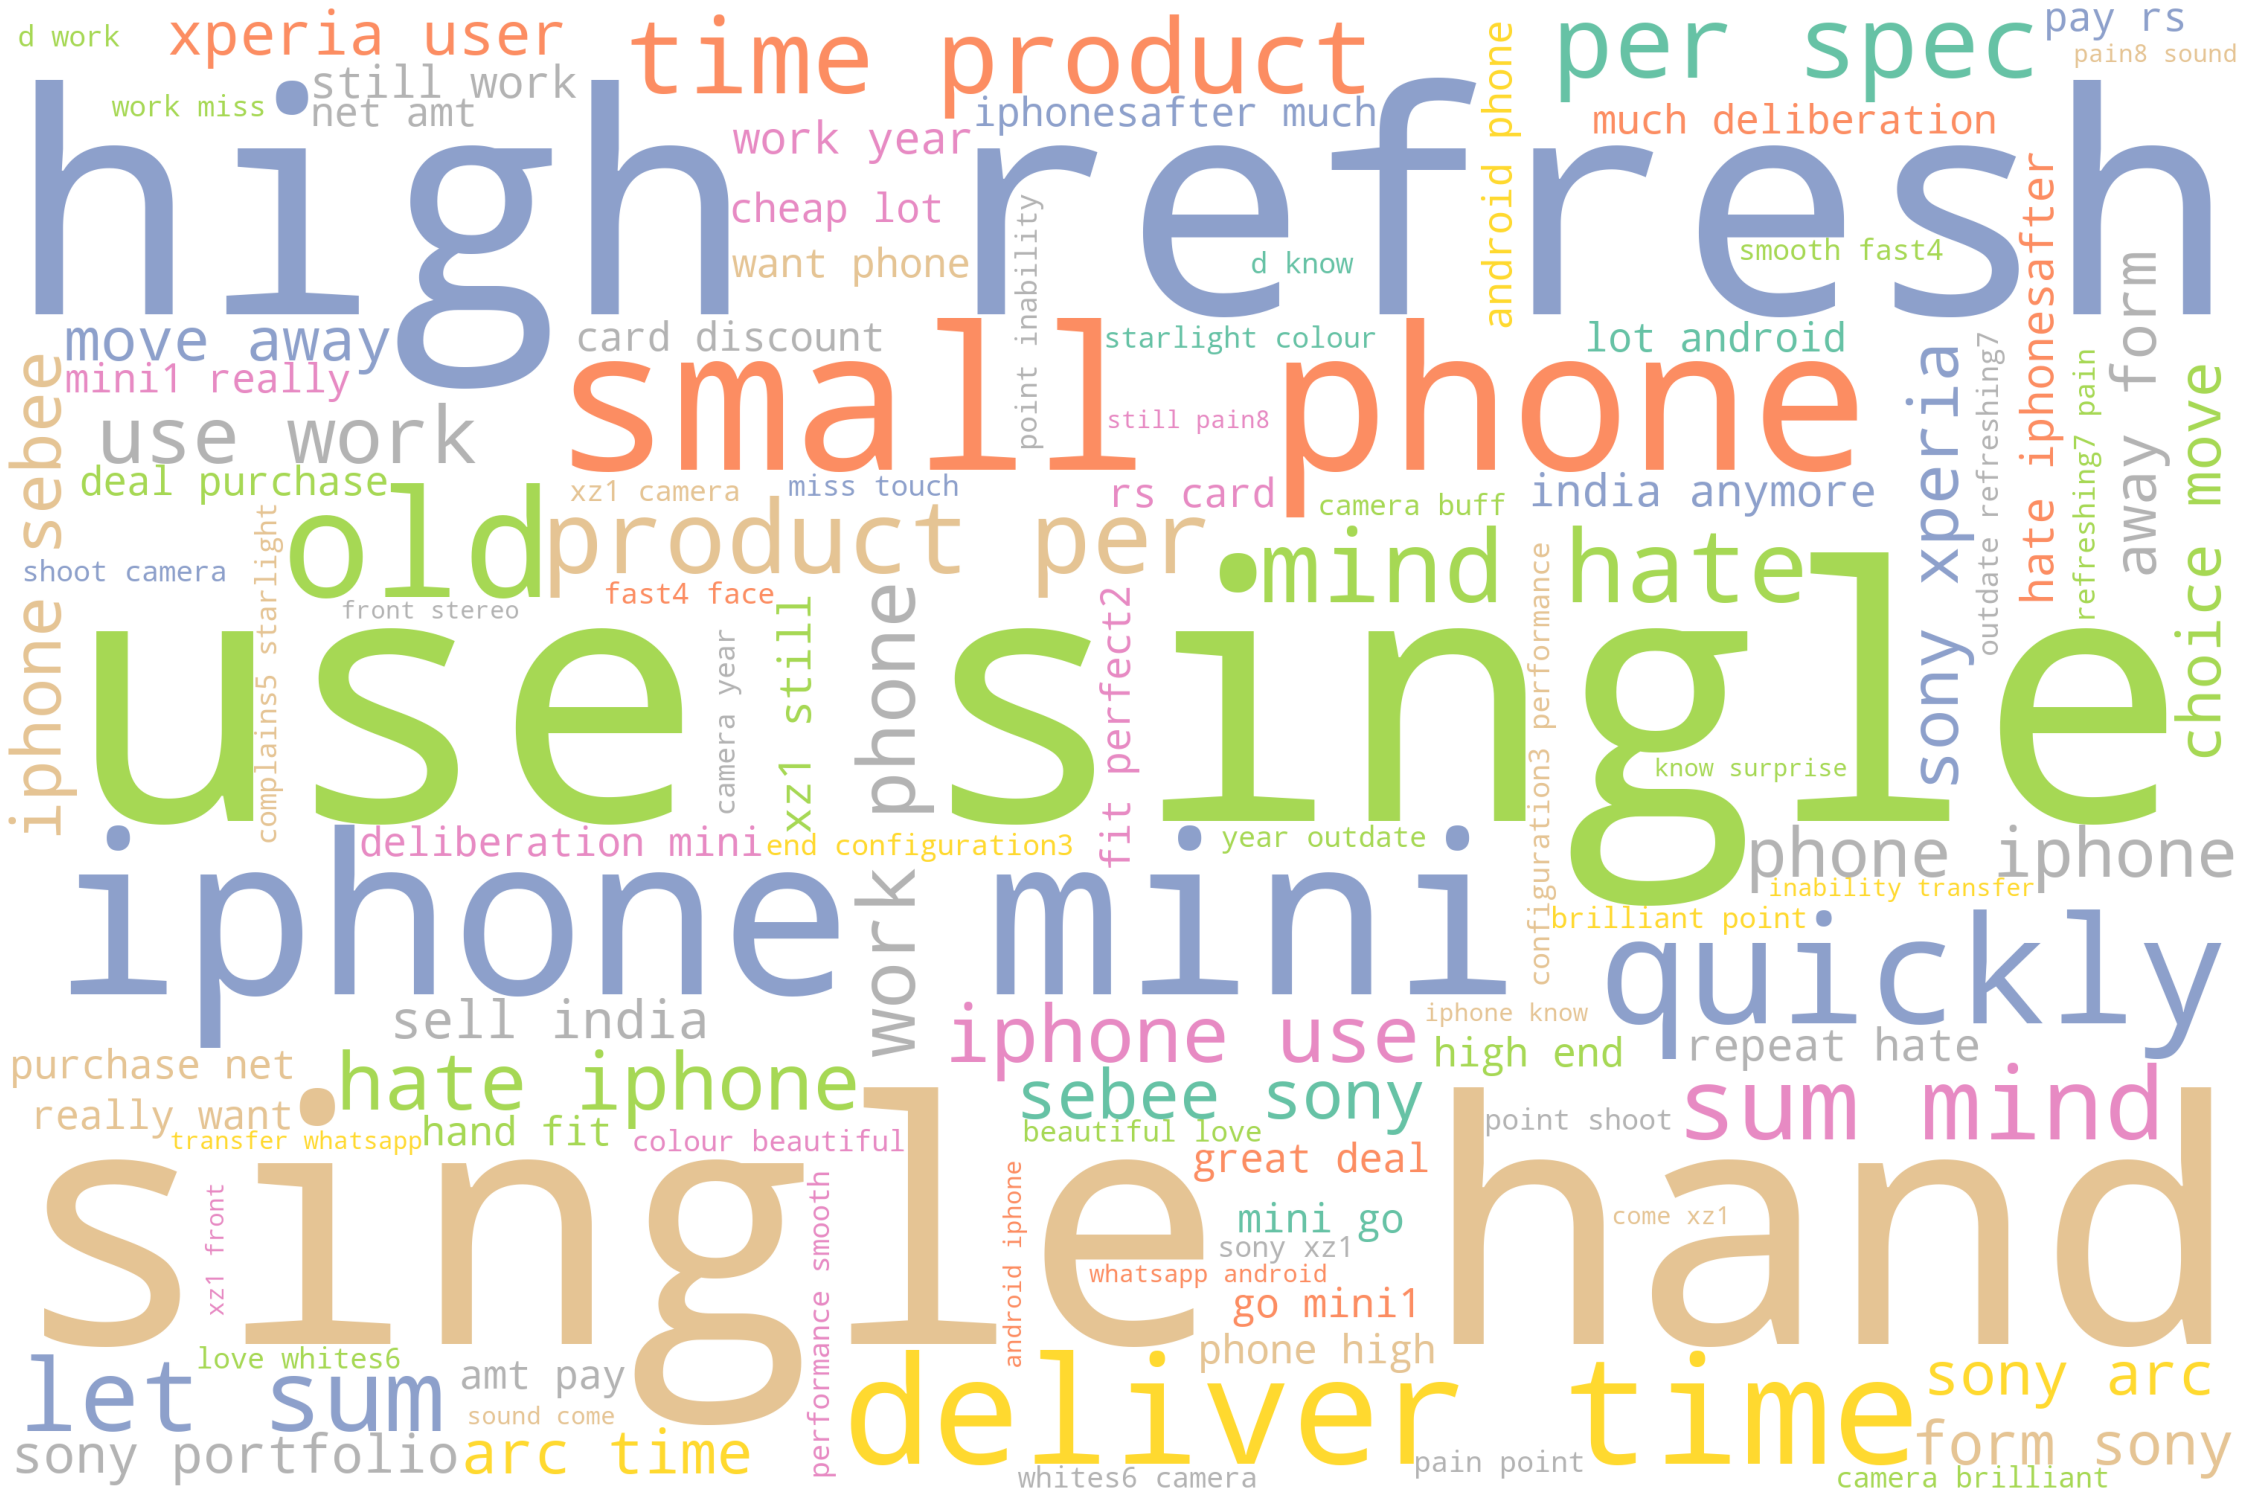

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

#### 5. Named Entity Recognition (NER)

In [ ]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

do AUX
not PART
like VERB
work NOUN
miss ADJ
touch NOUN
i PRON
d AUX
know VERB
get VERB
so ADV
complains5 ADJ
starlight VERB
colour ADJ
beautiful ADJ
love NOUN
whites6 NOUN
camera NOUN
brilliant ADJ
point NOUN
shoot VERB
camera NOUN
buff PROPN
my PRON
sony NOUN
xz1 PROPN
camera NOUN
5 NUM
year NOUN
outdate NOUN
refreshing7 NOUN
pain NOUN
point NOUN
inability NOUN
transfer NOUN
whatsapp ADJ
android VERB
iphone NOUN
know VERB
surprise NOUN
but CCONJ
still ADV
pain8 ADJ
sound PROPN
come VERB
xz1 SYM
front ADJ
stereo NOUN
experience NOUN
not PART
many ADJ
phone NOUN
sound NOUN
quality NOUN
this DET
phone NOUN
top ADJ
quality NOUN
so ADV
satisfied ADJ
quality9 NOUN
display NOUN
still ADV
love VERB
lcd ADJ
panel NOUN
but CCONJ
pretty ADV
sharp ADJ
bright ADJ
love NOUN
it10 PROPN
notch NOUN
do AUX
not PART
hurt VERB
eye NOUN
so ADV
do AUX
not PART
really ADV
care VERB
again ADV
know VERB
gettingif NOUN
power NOUN
user NOUN
concern NOUN
battery NOUN
power PROPN
bank NOUN
may AUX
useful ADJ
fee

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['gettingif', 'power', 'user', 'concern', 'battery', 'bank', 'feel', 'problem', 'user', 'prosform', 'factor', 'phone', 'market', 'offer', 'combination', 'ease', 'use', 'pocketability', 'performance', 'joy', 'use', 'handedbattery', 'life', 'compare', 'android', 'flagship', 'iphone', 'sufficientperformance', 'stutter', 'lag', 'freeze', 'whatsoeverdisplay', 'resolution', 'combine', 'screen', 'size', 'mean', 'density', 'refresh', 'rate', 'thoughcameras', 'm', 'photography', 'enthusiast', 're', 'point', 'click', 'note20', 'doableconsio', 'bag', 'get', 'impression', 'design', 'intention', 'end', 'user', 'adapt', 'prefer', 'customise', 'os', 'usage', 'adapt', 'people', 'prefer', 'case', 'protector', 'accessory', 'compete', 'product', 'offer', 'extraif', 'use', 'device', 'medium', 'consumption', 'see', 'phone', 'display', 'find', 'feel', 'give', 'nature', 'iphone', 'suit', 'communication', 'device', 'entertainment', 'want', 'iphone', 'work', 'call', 'text', 'email', 'iphone', 'model', 'iphone'

In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone   1560
1       iphone   1320
2          use    720
3         work    720
4       camera    720
5      product    480
6          get    480
7  performance    480
8         user    480
9         want    360

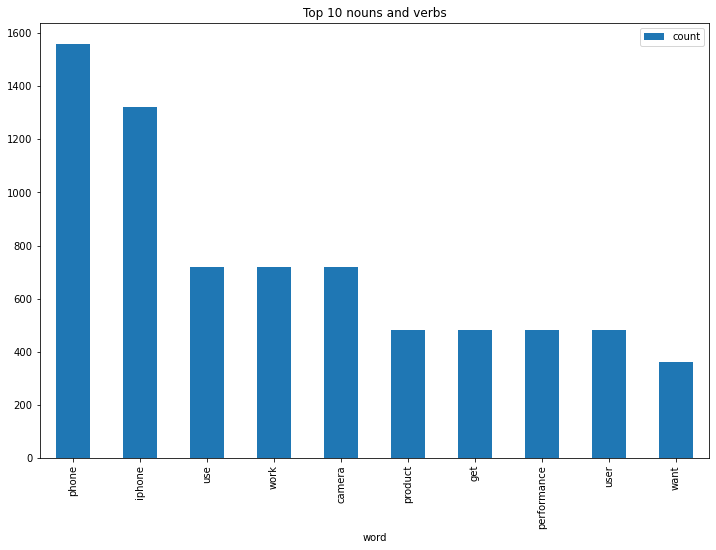

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

#### 6. Emotion Mining - Sentiment Analysis

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Delivered on time and the product was as per specs.',
 'No cheating.',
 'Delivered on time and the product was as per specs.',
 'No cheating.',
 'Let me sum up my mind here.',
 'I hate Iphones.',
 "I used to have an work phone (Iphone SE).Being a Sony Xperia user since Sony Arc times, I didn't have a choice to move away form the Sony portfolio as they don't sell in India anymore.",
 'My XZ1 is still working after 5.5 years, but she is getting old.',
 'And I repeat I hate IPhones.After much deliberation between 12, 13 and 13 Mini, I went with 13 Mini.1.',
 'I really wanted a phone I could use in a single hand, it fits perfect.2.',
 'I got a great deal on the purchase, as the net amt I paid was Rs.',
 '58,900 after card discounts.',
 'So it is cheaper than a lot of Android phones with high end configuration.3.',
 'Performance.',
 'It is smooth and fast.4.',
 'Face Id works.',
 "I don't like it, but it works, I miss the Touch Id, but i knew what I was getting.",
 'So no complains.5.',
 

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     Delivered on time and the product was as per s...
1                                          No cheating.
2     Delivered on time and the product was as per s...
3                                          No cheating.
4                           Let me sum up my mind here.
...                                                 ...
7978                           Anything and everything.
7979                   Been a iPhone user earlier also.
7980  Was skeptical about purchasing a relatively ex...
7981  If you’re coming for a small phone, this is ba...
7982  It is the phone you get if you want a small ye...

[7983 rows x 1 columns]

In [ ]:
# Emotion Lexicon - Affin
affin = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\DS Assignments\Assignment 11\Afinn.csv" ,sep=',' ,encoding='latin-1')
affin
#sep=',',

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='good service')

3

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        0
1       -1
2        0
3       -1
4        0
        ..
7978     0
7979     0
7980     3
7981    22
7982     5
Name: sentiment_value, Length: 7983, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       10
1        2
2       10
3        2
4        7
        ..
7978     3
7979     6
7980    44
7981    79
7982    18
Name: word_count, Length: 7983, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
5806  The only pain point is inability to transfer W...               -4   
5113  The only pain point is inability to transfer W...               -4   
6787  The only pain point is inability to transfer W...               -4   
2934  The only pain point is inability to transfer W...               -4   
4144  The only pain point is inability to transfer W...               -4   
...                                                 ...              ...   
6980  If you’re coming for a small phone, this is ba...               22   
7981  If you’re coming for a small phone, this is ba...               22   
7648  If you’re coming for a small phone, this is ba...               22   
2589  If you’re coming for a small phone, this is ba...               22   
1764  If you’re coming for a small phone, this is ba...               22   

      word_count  
5806          13  
5113          13  
6787          13  
2934          13  
4144          13  
...          ...  
6980          79  
7981          79  
7648          79  
2589          79  
1764          79  

[7983 rows x 3 columns]

In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    7983.000000
mean        1.428035
std         3.580243
min        -4.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        22.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0     Delivered on time and the product was as per s...                0   
1                                          No cheating.               -1   
2     Delivered on time and the product was as per s...                0   
3                                          No cheating.               -1   
4                           Let me sum up my mind here.                0   
...                                                 ...              ...   
7973                            Battry life is average.                0   
7976  My iPhone SE 128GB 1st Generation from 2018 (c...                0   
7977  Apple continues to find new methods to irritat...                0   
7978                           Anything and everything.                0   
7979                   Been a iPhone user earlier also.                0   

      word_count  
0             10  
1              2  
2             10  
3              2  
4              7  
...          ...  
7973           4  
7976          16  
7977          11  
7978           3  
7979           6  

[4514 rows x 3 columns]

In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
9     I really wanted a phone I could use in a singl...                2   
10    I got a great deal on the purchase, as the net...                2   
18                   The Starlight colour is beautiful.                3   
19                                     I love whites.6.                3   
20                                 Camera is brilliant.                4   
...                                                 ...              ...   
7974  Camera is perfect Product is just fantastic bu...                7   
7975   The Cameras do not support Macro/Close-up shots.                2   
7980  Was skeptical about purchasing a relatively ex...                3   
7981  If you’re coming for a small phone, this is ba...               22   
7982  It is the phone you get if you want a small ye...                5   

      word_count  
9             15  
10            16  
18             5  
19             3  
20             3  
...          ...  
7974          11  
7975           7  
7980          44  
7981          79  
7982          18  

[3469 rows x 3 columns]

In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0     Delivered on time and the product was as per s...                0   
1                                          No cheating.               -1   
2     Delivered on time and the product was as per s...                0   
3                                          No cheating.               -1   
4                           Let me sum up my mind here.                0   
...                                                 ...              ...   
7978                           Anything and everything.                0   
7979                   Been a iPhone user earlier also.                0   
7980  Was skeptical about purchasing a relatively ex...                3   
7981  If you’re coming for a small phone, this is ba...               22   
7982  It is the phone you get if you want a small ye...                5   

      word_count  index  
0             10      0  
1              2      1  
2             10      2  
3              2      3  
4              7      4  
...          ...    ...  
7978           3   7978  
7979           6   7979  
7980          44   7980  
7981          79   7981  
7982          18   7982  

[7983 rows x 4 columns]

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

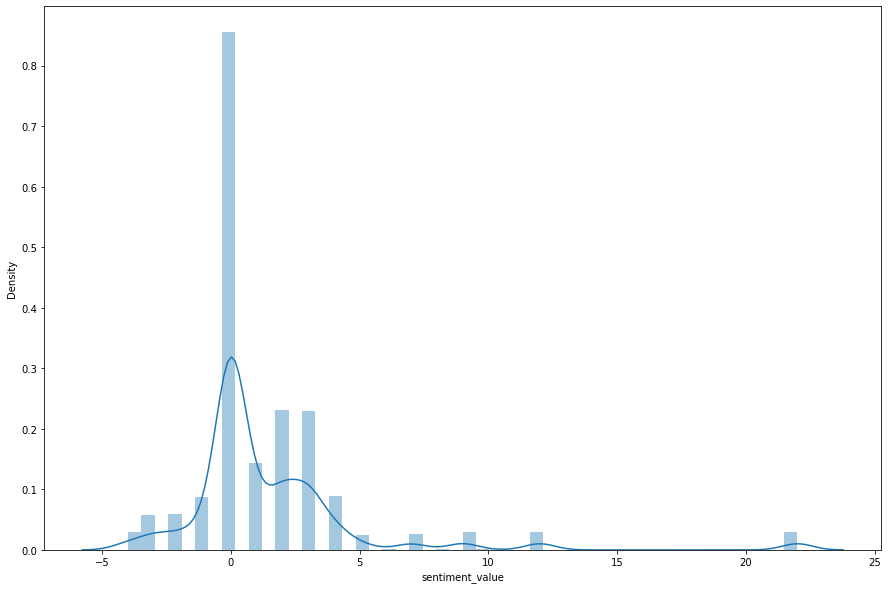

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

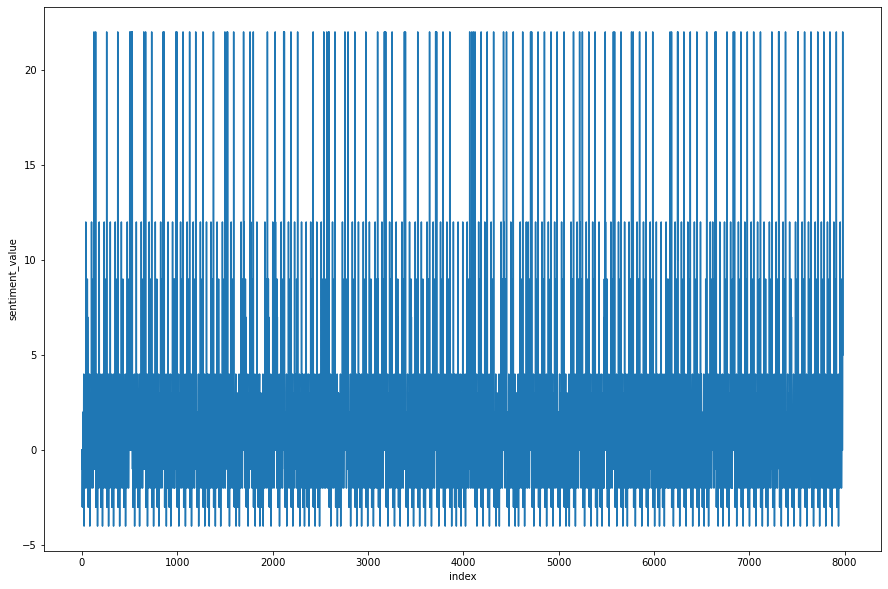

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)